In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMax
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv("profit_data.csv")

In [3]:
data

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
7,130298.13,145530.06,323876.68,Rangpur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.dtypes

Marketing Spend    float64
Administration     float64
Transport          float64
Area                object
Profit             float64
dtype: object

In [6]:
data.columns

Index(['Marketing Spend', 'Administration', 'Transport', 'Area', 'Profit'], dtype='object')

In [8]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [9]:
data.isna().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [10]:
data.describe()

,Marketing Spend,Administration,Transport,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


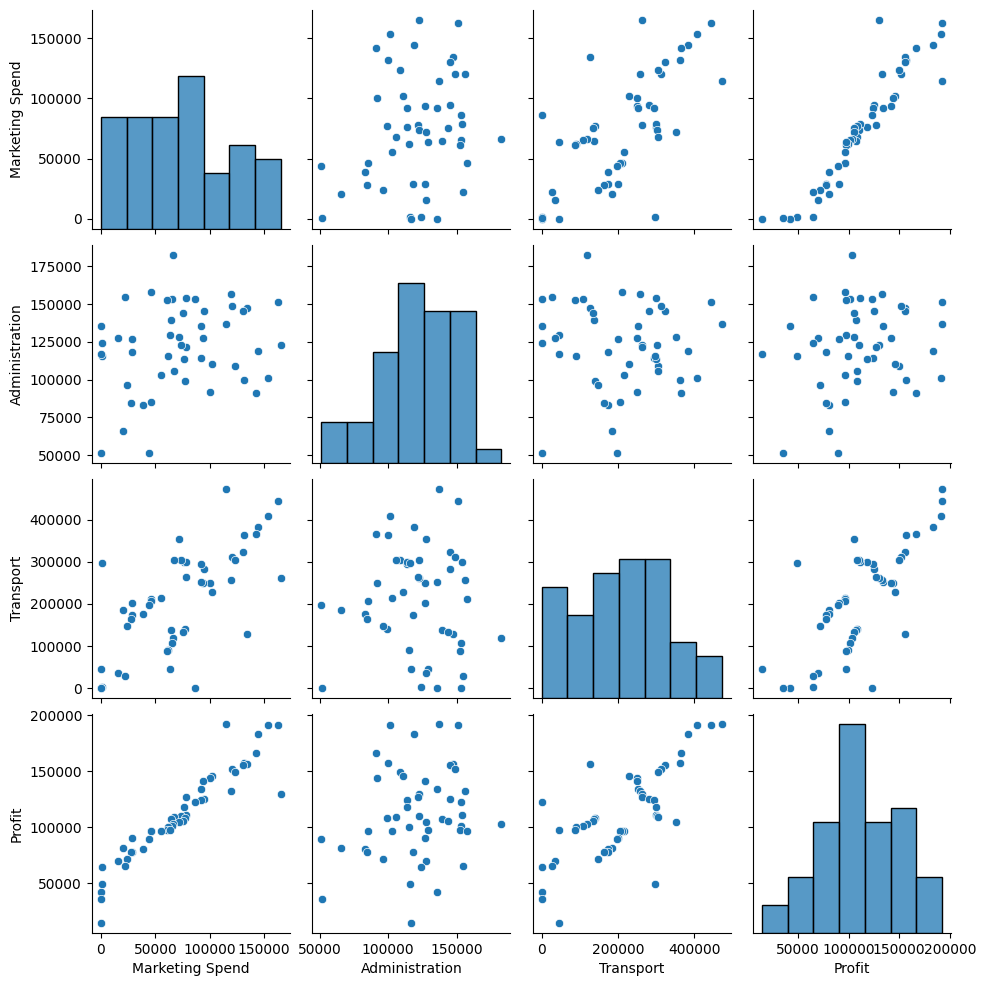

In [11]:
sns.pairplot(data)

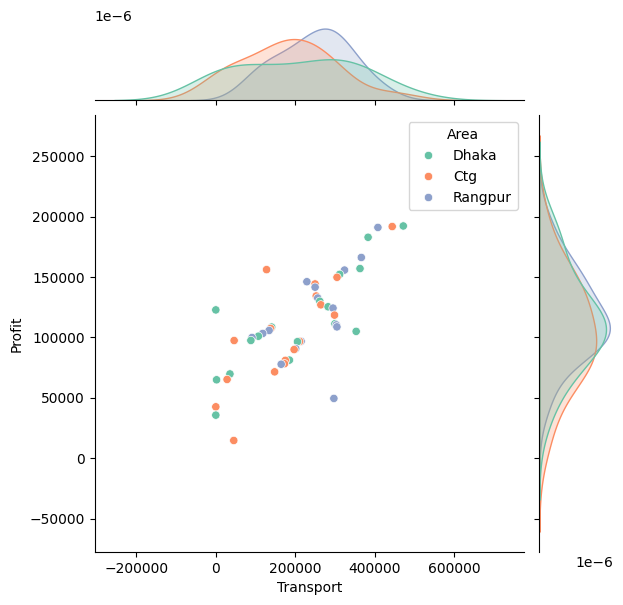

In [14]:
sns.jointplot(data = data, x = "Transport", y = "Profit", kind = "scatter", hue = "Area", palette = "Set2")

In [15]:
data["Area"]

0       Dhaka
1         Ctg
2     Rangpur
3       Dhaka
4     Rangpur
5       Dhaka
6         Ctg
7     Rangpur
8       Dhaka
9         Ctg
10    Rangpur
11        Ctg
12    Rangpur
13        Ctg
14    Rangpur
15      Dhaka
16        Ctg
17      Dhaka
18    Rangpur
19      Dhaka
20        Ctg
21      Dhaka
22    Rangpur
23    Rangpur
24      Dhaka
25        Ctg
26    Rangpur
27      Dhaka
28    Rangpur
29      Dhaka
30    Rangpur
31      Dhaka
32        Ctg
33    Rangpur
34        Ctg
35      Dhaka
36    Rangpur
37        Ctg
38      Dhaka
39        Ctg
40        Ctg
41    Rangpur
42        Ctg
43      Dhaka
44        Ctg
45      Dhaka
46    Rangpur
47        Ctg
48      Dhaka
49        Ctg
Name: Area, dtype: object

In [19]:
specific_columns = ["Rangpur"]
data[data["Area"].isin(specific_columns)]

,Marketing Spend,Administration,Transport,Area,Profit
2,153441.51,101145.55,407934.54,Rangpur,191050.39
4,142107.34,91391.77,366168.42,Rangpur,166187.94
7,130298.13,145530.06,323876.68,Rangpur,155752.60
10,101913.08,110594.11,229160.95,Rangpur,146121.95
12,93863.75,127320.38,249839.44,Rangpur,141585.52
14,119943.24,156547.42,256512.92,Rangpur,132602.65
18,91749.16,114175.79,294919.57,Rangpur,124266.90
22,73994.56,122782.75,303319.26,Rangpur,110352.25
23,67532.53,105751.03,304768.73,Rangpur,108733.99
26,75328.87,144135.98,134050.07,Rangpur,105733.54


In [20]:
data.columns

Index(['Marketing Spend', 'Administration', 'Transport', 'Area', 'Profit'], dtype='object')

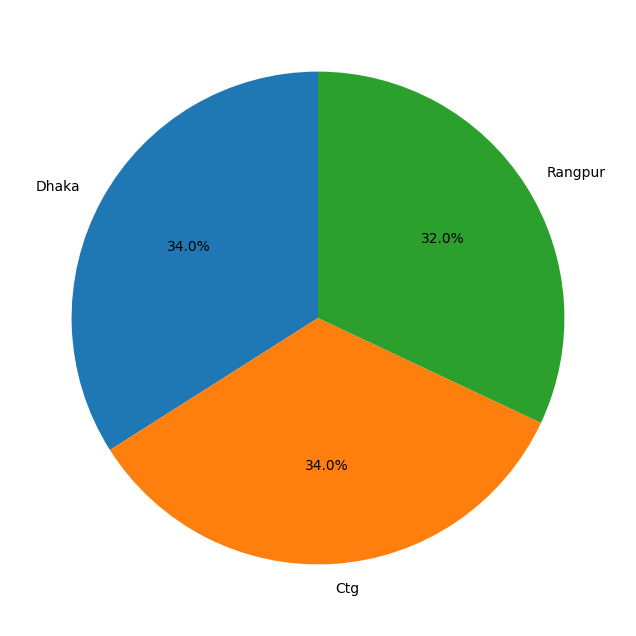

In [23]:
plt.figure(figsize = (12,8))
Area = data["Area"].value_counts()
plt.pie(Area, labels = Area.index,autopct = "%1.1f%%", startangle = 90)
plt.show()


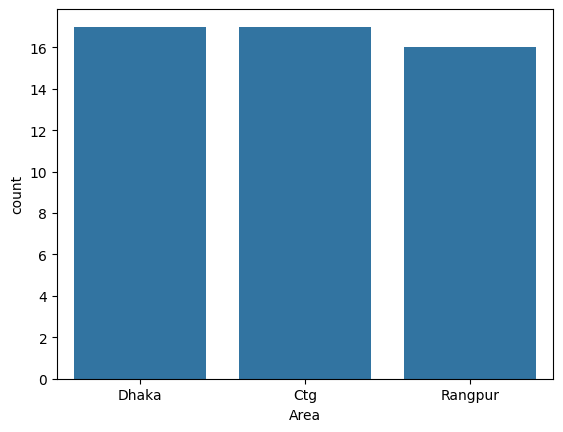

In [26]:
sns.countplot(data = data, x ="Area")
plt.show()

In [47]:
data[data["Marketing Spend"]<100]

,Marketing Spend,Administration,Transport,Area,Profit
47,0.0,135426.92,0.00,Ctg,42559.73
49,0.0,116983.80,45173.06,Ctg,14681.40


In [49]:
data["Area"].value_counts()

Area
Dhaka      17
Ctg        17
Rangpur    16
Name: count, dtype: int64

In [50]:
data["Area"].unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [51]:
data["Area"] = data["Area"].replace(["Dhaka","Ctg","Rangpur"],[0,1,2])

C:\Users\USER\AppData\Local\Temp\ipykernel_6692\3049224943.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Area"] = data["Area"].replace(["Dhaka","Ctg","Rangpur"],[0,1,2])


In [52]:
data["Area"]

0     0
1     1
2     2
3     0
4     2
5     0
6     1
7     2
8     0
9     1
10    2
11    1
12    2
13    1
14    2
15    0
16    1
17    0
18    2
19    0
20    1
21    0
22    2
23    2
24    0
25    1
26    2
27    0
28    2
29    0
30    2
31    0
32    1
33    2
34    1
35    0
36    2
37    1
38    0
39    1
40    1
41    2
42    1
43    0
44    1
45    0
46    2
47    1
48    0
49    1
Name: Area, dtype: int64

In [53]:
data

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94
5,131876.90,99814.71,362861.36,0,156991.12
6,134615.46,147198.87,127716.82,1,156122.51
7,130298.13,145530.06,323876.68,2,155752.60
8,120542.52,148718.95,311613.29,0,152211.77
9,123334.88,108679.17,304981.62,1,149759.96


In [54]:
data.describe()

,Marketing Spend,Administration,Transport,Area,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,0.980000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.820403,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [63]:
x = data.drop(["Profit"], axis = 1) 
y = data.drop(["Area"], axis =1)

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [95]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [96]:
pred = tree.predict(X_test)
pred

array([[ 78013.11, 121597.55, 264346.06, 126992.93],
       [ 20229.59,  65947.93, 185265.1 ,  81229.06],
       [ 61136.38, 152701.92,  88218.23,  97483.56],
       [     0.  , 135426.92,      0.  ,  42559.73],
       [ 93863.75, 127320.38, 249839.44, 141585.52],
       [     0.  , 116983.8 ,  45173.06,  14681.4 ],
       [134615.46, 147198.87, 127716.82, 156122.51],
       [ 77044.01,  99281.34, 140574.81, 108552.04],
       [ 61136.38, 152701.92,  88218.23,  97483.56],
       [ 66051.52, 182645.56, 118148.2 , 103282.38]])

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
score = r2_score(y_test, pred)

In [76]:
score

0.19124585306694492

In [79]:
from sklearn.linear_model import LinearRegression
Regression = LinearRegression()
Regression.fit(X_train, y_train)

LinearRegression()

In [80]:
pred = Regression.predict(X_test)

In [81]:
pred

array([[9.19923900e+04, 1.35495070e+05, 2.52664930e+05, 1.26870491e+05],
       [3.85585100e+04, 8.29820900e+04, 1.74999300e+05, 8.37061800e+04],
       [6.19944800e+04, 1.15641280e+05, 9.11312400e+04, 9.19013829e+04],
       [1.00023000e+03, 1.24153040e+05, 1.90393000e+03, 4.38383649e+04],
       [9.46571600e+04, 1.45077580e+05, 2.82574310e+05, 1.31705745e+05],
       [5.42050000e+02, 5.17431500e+04, 1.03211961e-10, 4.26266246e+04],
       [7.53288700e+04, 1.44135980e+05, 1.34050070e+05, 1.04935340e+05],
       [6.46647100e+04, 1.39553160e+05, 1.37962620e+05, 9.83999227e+04],
       [6.34088600e+04, 1.29219610e+05, 4.60852500e+04, 8.92355696e+04],
       [8.64197000e+04, 1.53514110e+05, 4.26417305e-11, 1.01007176e+05]])

In [82]:
score = r2_score(y_test, pred)

In [83]:
score

0.960387833013193

In [86]:
from sklearn.ensemble import RandomForestRegressor
ensemble = RandomForestRegressor()
ensemble.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
pred = ensemble.predict(X_test)

In [88]:
pred

array([[ 96067.5435, 121275.1462, 259682.0558, 134968.0079],
       [ 31728.3658,  85775.0346, 179789.1805,  82672.4346],
       [ 68133.7692, 147734.4985, 107687.5235, 102789.6745],
       [  8069.2373, 129962.8309,  27877.422 ,  47648.022 ],
       [ 94228.2827, 135560.6867, 288675.2261, 122095.2222],
       [  8566.2689, 126408.8885,  36049.4676,  43261.1281],
       [ 92874.8208, 141471.6717, 135911.4348, 123856.799 ],
       [ 69799.2433, 125693.6229, 146055.0133, 106634.153 ],
       [ 32419.6996, 139893.4424,  57902.5882,  69333.0657],
       [ 37329.5995, 148150.7246,  62925.5558,  78051.2279]])

In [89]:
score = r2_score(y_test, pred)

In [90]:
score

0.5819298602222023

In [91]:
Mean_error = mean_absolute_error(y_test, pred)

In [93]:
Mean_error

np.float64(15330.100477500011)

                   R² Score           MAE           MSE
Linear Regression  0.960388   2307.859053  3.207762e+07
Decision Tree      0.431734  20622.583000  9.602262e+08
Random Forest      0.631331  14802.321523  5.059401e+08


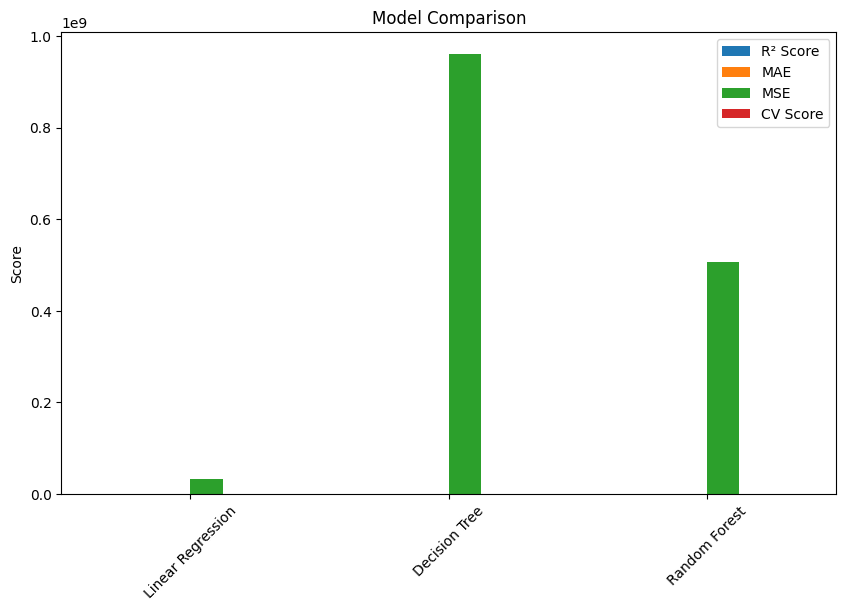

In [100]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    # Store results
    results[name] = {'R² Score': r2, 'MAE': mae, 'MSE': mse}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T

# Display results
print(results_df)

# Cross-validation scores for each model
cv_results = {}
for name, model in models.items():
    cv_score = cross_val_score(model, x, y, cv=5)  # 5-fold cross-validation
    cv_results[name] = cv_score.mean()

# Add cross-validation results to the DataFrame
results_df['CV Score'] = pd.Series(cv_results)

# Visualize the comparison of models using a bar plot
results_df[['R² Score', 'MAE', 'MSE', 'CV Score']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()
